# An Introduction to the Discrete Fourier Transform
# Lecture 1: Overview



In [12]:
from IPython.display import Audio
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib notebook

### The text file "file.txt" contains sampled values from a recording of a note played on the piano at the rate of 44100 Hz.

### Load the data into an array and play the audio.

In [2]:
ys = np.loadtxt("file.txt")

In [5]:
print(ys.size)

100000


In [6]:
ys

array([ 37.,  36.,  34., ..., 246., 262., 275.])

In [7]:
Audio(ys, rate=44100)

In [8]:
ys2 = ys[50000:]
Audio(ys2, rate=44100)

In [14]:
ts = np.linspace(0, 2*np.pi, 50)
ys = np.sin(ts)

<IPython.core.display.Javascript object>


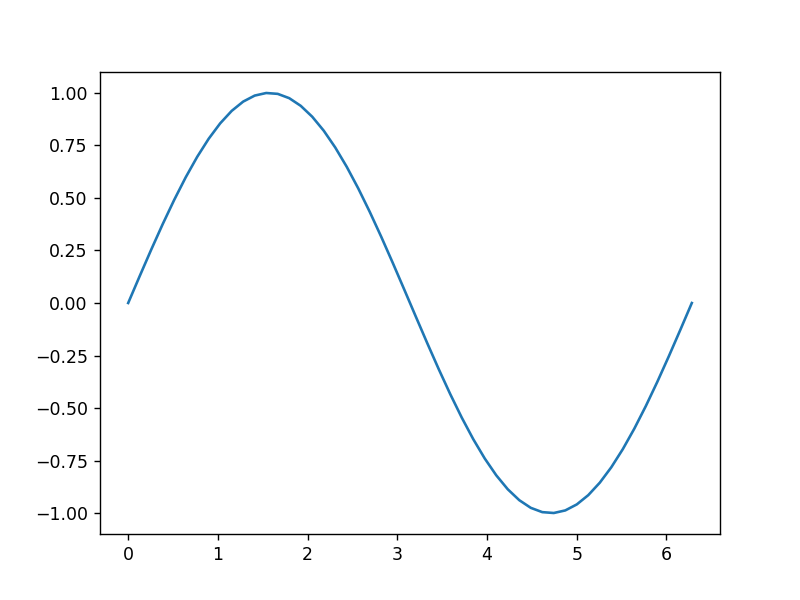

In [15]:
fig, ax = plt.subplots()
ax.plot(ts,ys)

In [16]:
ys = np.loadtxt("file.txt")
print(ys)

array([ 37.,  36.,  34., ..., 246., 262., 275.])

In [18]:
wavfile.write("file.wav", 44100, ys)

In [7]:
ys.shape[0]


100000

In [3]:
Audio(ys, rate = 44100)

#### Graph the audio waveform. 

<IPython.core.display.Javascript object>


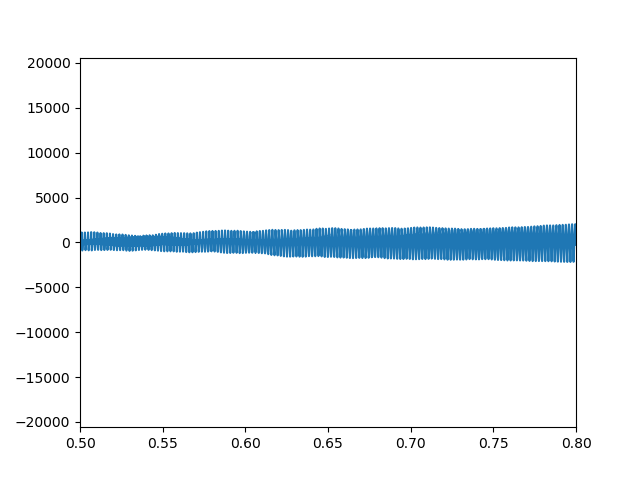

(0.5, 0.8)

In [15]:
import matplotlib.pyplot as plt
N = ys.size
fs = 44100 # Hz
L = N/fs # seconds
ts = np.linspace(0, L, N)
fig, ax = plt.subplots()
ax.plot(ts, ys)
ax.set_xlim(.5,.8)

#### Use the Discrete Fourier Transform to convert the information to a different but equivalent representation: frequency domain representation.

#### $\{y_k : k=0,1,2,...,N-1\}\rightarrow \{Y_k : k=0,1,2,...,N-1\}$ 

#### Each $|Y_k|$ measures how much the frequency $f_k=k\cdot f_1$ is present in the audio signal where $f_1=1/L$ is the fundamental frequency.



#### The frequency set given by $f_k=k/L$ are called the harmonics. In this example, the fundamental frequency is $1/L=0.441$ Hz.

#### Let's create the frequency set $f_k$.

In [10]:
k = np.arange(N) # 0 to N-1
freqs = k/L
freqs[0:10]

array([0.   , 0.441, 0.882, 1.323, 1.764, 2.205, 2.646, 3.087, 3.528,
       3.969])

#### Use Numpy's fft module to compute the Fast Fourier Transform. 

In [11]:
yk = np.fft.fft(ys)
yk.size

100000

#### Graph the frequency domain representation. 

<IPython.core.display.Javascript object>


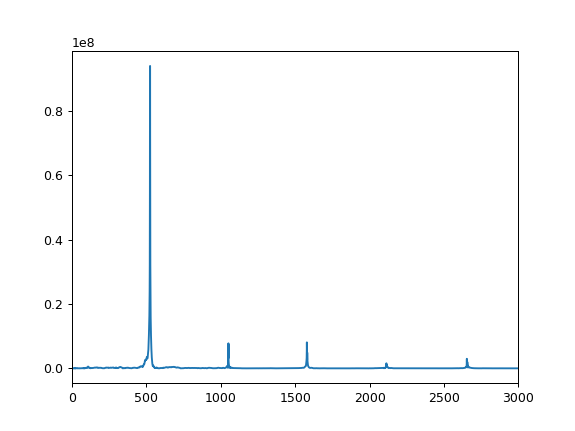

(0, 3000)

In [12]:
fig, ax = plt.subplots()
ax.plot(freqs, np.abs(yk))
ax.set_xlim(0,3000)

#### The wav file a4_violin.wav contains a chord played on a violin.

In [ ]:
from scipy.io import wavfile
fs, ys = wavfile.read("a4_violin.wav")
Audio(ys, rate = fs)

#### Combine all of the sample code above to define a function `plot_signal_time` that plot a sampled signal.

In [ ]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")


#### Use `plot_signal_time` to plot the time domain representation of the violin recording.

In [ ]:
plot_signal_time(ys,0,.5)

In [ ]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")
    

#### Use `plot_signal_frequency` to plot the frequency domain representation of the violin recording.

In [ ]:
plot_signal_frequency(ys, 0, 3000)

#### The file trumpet_chirp.txt contains a trumpet note with some high frequency noise(I added a linear chirp consisting a sinusoid that sweeps linearly through a range of high frequencies). 


In [ ]:
ys = np.loadtxt("trumpet_chirp.txt")
Audio(ys,rate=fs)

#### One of the assignments for this video is to filter out this high frequency noise and create a new .wav file of just the trumpet. 

#### Your assignment for this lecture is to analyze notes/chords of various instruments.  